# Decision Trees Lab

In this lab we will discover how to apply decision trees to regression and classification problems.

### 1: Build a classification tree

How do you build a decision tree? You're going to find out by building one in pairs!

Your training data is a tiny dataset of [used vehicle sale prices](../../assets/datasets/used_cars.csv). Your goal is to predict Price for out-of-sample data. Here are your instructions:

1. Read the data into Pandas.
- Explore the data by sorting, plotting, or split-apply-combine (aka `group_by`).
- Decide which feature is the most important predictor, and use that to make your first split. (Only binary splits are allowed!)
- After making your first split, you should actually split your data in Pandas into two parts, and then explore each part to figure out what other splits to make.
- Decide if you need additional splits along other features
- Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting. (As always, your goal is to build a model that generalizes well!)
- You are allowed to split on the same variable multiple times!
- Draw your tree on a piece of paper, making sure to label your leaves with the mean Price for the observations in that "bucket".
- When you're finished, review your tree to make sure nothing is backwards. (Remember: follow the left branch if the rule is true, and follow the right branch if the rule is false.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

import numpy as np

/Users/dnay/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#read data into pandas
df = pd.read_csv("../../assets/datasets/used_cars.csv")
df.head()

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [3]:
#total price of cars vs trucks
print pd.pivot_table(df, index=['type'], values=['price'], aggfunc=np.sum)

       price
type        
car    85700
truck   6300


In [4]:
#average price of vehicle by year and type 
print pd.pivot_table(df, index=['year', 'type'], values=['price'], aggfunc=np.mean)

            price
year type        
1997 car     1300
1999 truck   1800
2001 car     5000
2003 car     2450
     truck   2500
2004 car     3000
     truck   2000
2006 car     4000
2007 car     9000
2009 car     9500
2010 car    13500
2012 car    22000


In [5]:
#price versus miles
print pd.pivot_table(df, index=['type','miles'], values=['price'], aggfunc=np.mean)

              price
type  miles        
car   13000   22000
      30000   14000
      47000    9000
      62000    5000
      73500   13000
      78000    9500
      124000   4000
      138000   2150
      160000   1900
      177000   3000
truck 163000   1800
      190000   2500
      209000   2000


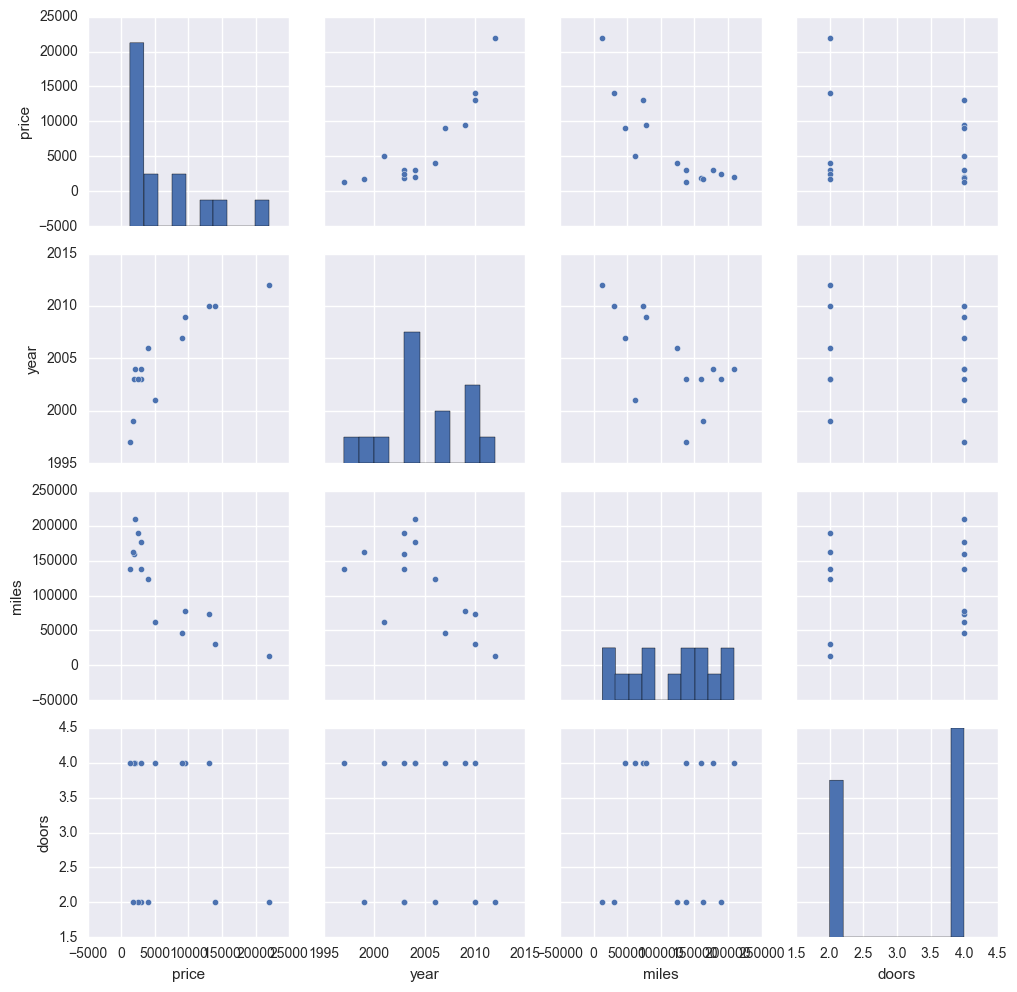

In [6]:
sns.pairplot(df)

- year seems to correlate positively with price
- miles seems to correlate negatively with price
- doors doesn't seem to have any effect

Miles seems to be more important than year made. Using year made, there is an outlier for the vehicle at 2001 worth 5000 - if I use year, it will have it much lower than other cars worth less based off years.


                        Parent node - type of car
Left child node 1 - price of trucks  -  Right child node 1 - miles of cars (<=78000)
                                        left child node 2 - price         right child node 2 - price

#### How does a computer build a regression tree?

The ideal approach would be for the computer to consider every possible partition of the feature space. However, this is computationally infeasible, so instead an approach is used called **recursive binary splitting:**

- Begin at the top of the tree.
- For every single predictor, examine every possible cutpoint, and choose the predictor and cutpoint such that the resulting tree has the **lowest possible mean squared error (MSE)**. Make that split.
- Repeat the examination for the two resulting regions, and again make a single split (in one of the regions) to minimize the MSE.
- Keep repeating this process until a stopping criteria is met.

**How does it know when to stop?**

1. We could define a stopping criterion, such as a **maximum depth** of the tree or the **minimum number of samples in the leaf**.
2. We could grow the tree deep, and then "prune" it back using a method such as "cost complexity pruning" (aka "weakest link pruning").

Method 2 involves setting a tuning parameter that penalizes the tree for having too many leaves. As the parameter is increased, branches automatically get pruned from the tree, resulting in smaller and smaller trees. The tuning parameter can be selected through cross-validation.

Note: **Method 2 is not currently supported by scikit-learn**, and so we will use Method 1 instead.


### 2: Build a regression tree in scikit-learn

Building a tree by hand was not so easy, and also not ideal. Let's use scikit-learn to build an optimal regression tree. Do the following:

- Map the `type` column to a binary variable
- Create a matrix `X` that contains the feature values and a vector `y` that contains the price values
- Split the data into train-test using a random state of 42 and test_size of 30%
- Import and initialize the `DecisionTreeRegressor` class from scikit-learn
- Fit it to the training set
- Predict the values of the test set
- Display the predicted and actual values in a plot
- Use r2_score to judge the goodness of the regression

In [7]:
#map type column to binary
df['type'] = [0 if x == 'truck' else 1 for x in df['type']]

In [8]:
# Create a matrix X that contains the feature values and a vector y that contains the price values
X = df[['type','miles','doors','year']]
y = df['price']

In [9]:
# Split the data into train-test using a random state of 42 and test_size of 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
# Import and initialize the DecisionTreeRegressor class from scikit-learn
clf = DecisionTreeRegressor(random_state=0)

In [19]:
# Fit it to the training set
clf = clf.fit(X_train, Y_train)

In [20]:
# Predict the values of the test set
Y_pred = clf.predict(X_test)

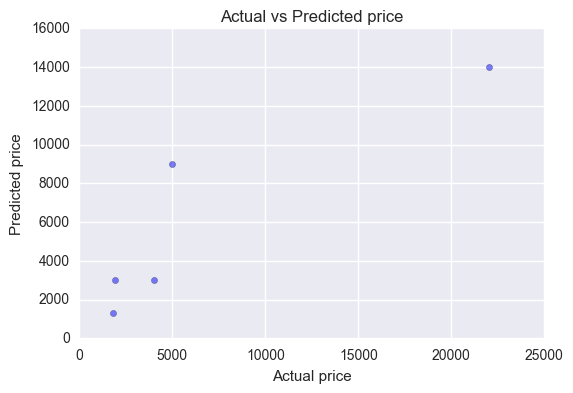

In [21]:
# Display the predicted and actual values in a plot
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted price")

In [22]:
# Use r2_score to judge the goodness of the regression
clf.score(X,y)

0.8328971594659379

### 3.b Global parameters

The `DecisionTreeRegressor` offers few global parameters that can be changed at initialization. For example one can set the `max_depth` or the `min_samples_leaf` parameters and impose global constraints on the space of solutions.

1. Use `cross_val_score` with 3-fold cross validation to find the optimal value for the `max_depth` (explore values 1 - 10). Note that you will have to set `scoring='mean_squared_error'` as criterion for score. Always set `random_state=1`
- Plot the error as a function of `max_depth`

In [23]:
# Use cross_val_score with 3-fold cross validation to find the optimal value for the max_depth (explore values 1 - 10)
# Note that you will have to set scoring='mean_squared_error' as criterion for score. Always set random_state=1
for i in range(1,11):
    clf1 = DecisionTreeRegressor(random_state=1, max_depth=i)
    print "Max depth %i: "%(i),cross_val_score(clf1, X, y, cv=3)

Max depth 1:  [-3.71559633 -7.2184973  -1.93559698]
Max depth 2:  [ -4.13990826e+00  -8.70097709e+00  -8.35599506e-03]
Max depth 3:  [-4.13990826 -8.29507338 -0.01514215]
Max depth 4:  [-4.13990826 -8.34130728  0.11248455]
Max depth 5:  [-4.13990826 -9.8490566   0.1025958 ]
Max depth 6:  [-4.13990826 -9.8490566   0.1025958 ]
Max depth 7:  [-4.13990826 -9.8490566   0.1025958 ]
Max depth 8:  [-4.13990826 -9.8490566   0.1025958 ]
Max depth 9:  [-4.13990826 -9.8490566   0.1025958 ]
Max depth 10:  [-4.13990826 -9.8490566   0.1025958 ]


At max depth 5, all the numbers stop changing

## 3.c Feature importances

The decision tree class exposes an attribute called `feature_importances_`.

1. Check the importance of each feature. what's the most important feature?

In [24]:
# Check the importance
impo = pd.DataFrame(clf.feature_importances_).transpose()
impo.columns = ['year', 'miles', 'doors', 'type']
impo

,year,miles,doors,type
0,0.002793,0.896814,0.002483,0.097909


miles appear to be most important

### 3.d Tree visualization

Follow the example in the [documentation](http://scikit-learn.org/stable/modules/tree.html) to visualize the tree.
You may have to install `pydot` and/or `graphviz` if you don't have them already.

In [25]:
from sklearn import tree
with open("X.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [26]:
import os
os.unlink('X.dot')

In [27]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("X.pdf") 

True

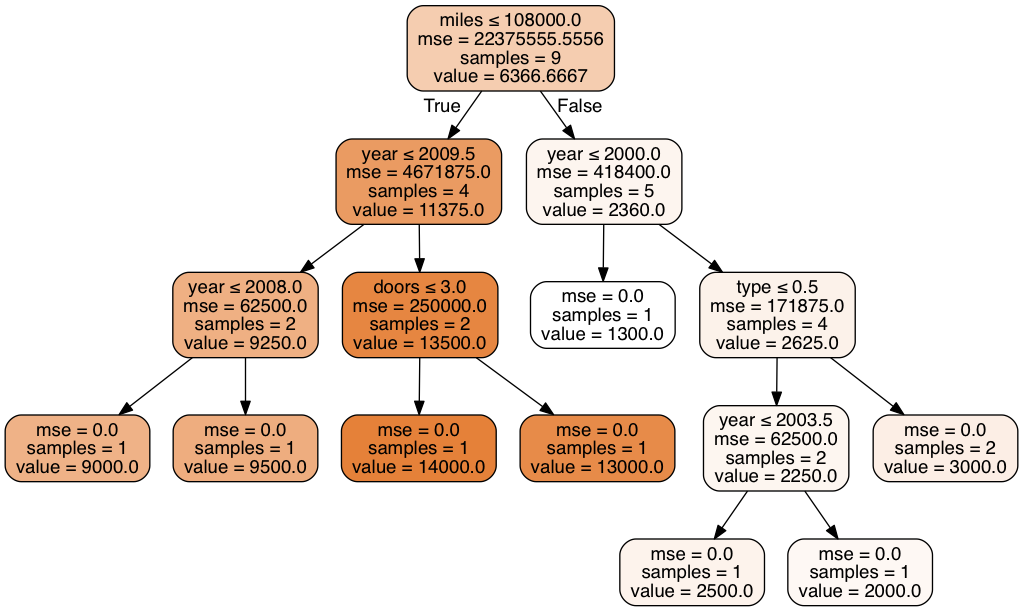

In [28]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names='Price',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

#### Interpreting a tree diagram

How do we read this decision tree?

**Internal nodes:**

- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- First line is the condition used to split that node (go left if true, go right if false)

**Leaves:**

- `samples` is the number of observations in that node
- `value` is the mean response value in that node
- `mse` is the mean squared error calculated by comparing the actual response values in that node against "value"

### Exercise 4: Use GridSearchCV to find te best Regression Tree

How do we know by pruning with max depth is the best model for us? Trees offer a variety of ways to pre-prune (that is, we tell a computer how to design the resulting tree with certain "gotchas").

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

1. Initialize reasonable ranges for all parameters and find the optimal combination using Grid Search.

In [30]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(clf, param_grid = [
        {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [1, 2, 3, 4],
    'max_leaf_nodes': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5, 6], 'min_samples_split': [2, 3, 4, 5]}])
gs.fit(X, y)
print 'The following are the best parameters for this model:', gs.best_params_

The following are the best parameters for this model: {'max_features': 3, 'max_leaf_nodes': 3, 'min_samples_split': 2, 'max_depth': 1, 'min_samples_leaf': 3}


## 4 Classification trees

Classification trees are very similar to regression trees. Here is a quick comparison:

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize a different criterion (discussed below)|

Note that classification trees easily handle **more than two response classes**! (How have other classification models we've seen handled this scenario?)

Here's an **example of a classification tree**, which predicts whether or not a patient who presented with chest pain has heart disease:

### 4.a Building a classification tree in scikit-learn
We'll build a classification tree using the [Car Dataset](./assets/datasets/cars.csv).

- Load the dataset in pandas
- Check for missing values
- Encode all the categorical features to booleans using `pd.get_dummies`
- Encode the labels using LabelEncoder
- Split X and y with train_test split like above
        train_test_split(X, y, test_size=0.3, random_state=42)
- Fit a classification tree with `max_depth=3` on all data
- Visualize the tree using graphviz
- Compute the feature importances
- Compute and display the confusion matrix
- Release the constraint of `max_depth=3` and see if the classification improves

In [33]:
df1 = pd.read_csv('../../assets/datasets/cars.csv')
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying           1728 non-null object
maint            1728 non-null object
doors            1728 non-null object
persons          1728 non-null object
lug_boot         1728 non-null object
safety           1728 non-null object
acceptability    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [37]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = df1['acceptability']
le.fit(y)
y = le.transform(y)

# Encode categorical features to booleans
X = pd.get_dummies(df1[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']])

In [38]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

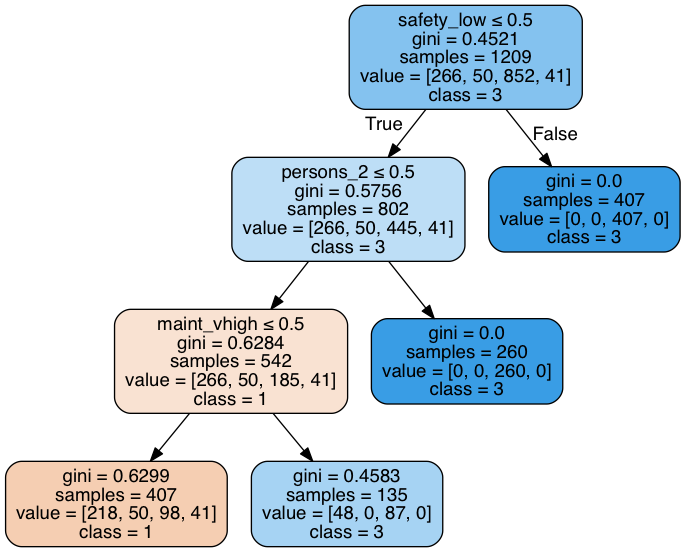

In [40]:
# Visualize the tree using graphviz
with open("X.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

os.unlink('X.dot')
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("X.pdf")
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names='1234',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [41]:

# Compute the feature importances
importance = pd.DataFrame(clf.feature_importances_).transpose()
importance.columns = [X.columns]
importance.transpose()

,0
buying_high,0.000000
buying_low,0.000000
buying_med,0.000000
buying_vhigh,0.000000
maint_high,0.000000
maint_low,0.000000
maint_med,0.000000
maint_vhigh,0.097928
doors_2,0.000000
doors_3,0.000000


In [43]:
# Compute and display the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm.index = ['accuracy','good','unaccurate', 'very good']
cm.columns = ['predict accuracy','predict good','predict unaccurate', 'predict very good']
cm

,predict accuracy,predict good,predict unaccurate,predict very good
accuracy,94,0,24,0
good,19,0,0,0
unaccurate,32,0,326,0
very good,24,0,0,0


In [45]:
# Release the constraint of max_depth=3 and see if the classification improves
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [46]:
y_pred = clf1.predict(X_test)
cm1 = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm1.index = ['accuracy','good','unaccurate', 'very good']
cm1.columns = ['predict accuracy','predict good','predict unaccurate', 'predict very good']
cm1

,predict accuracy,predict good,predict unaccurate,predict very good
accuracy,105,3,7,3
good,0,18,0,1
unaccurate,3,0,355,0
very good,3,2,0,19


## Bonus

Visualize the last tree. Can you make sense of it? What does this teach you about decision tree interpretability?


In [ ]:
with open("X.dot", 'w') as f:
    f = tree.export_graphviz(clf1, out_file=f)

os.unlink('X.dot')

dot_data = tree.export_graphviz(clf1, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("X.pdf")

dot_data = tree.export_graphviz(clf1, out_file=None, 
                         feature_names=X.columns,  
                         class_names='1234',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())